In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import metrics

In [27]:
df=pd.read_csv('C:\\Users\\Goksun\\Downloads\\heart.csv')
df=df.iloc[:300]

In [28]:
# Define the features and the outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [29]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Answer 1

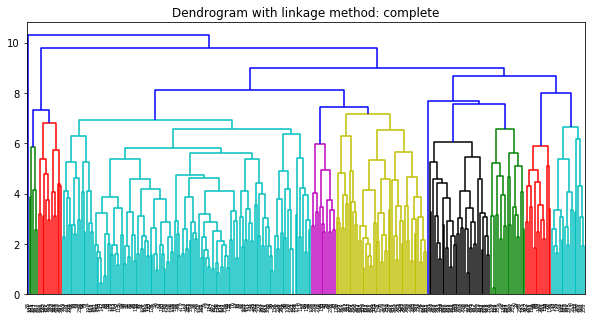

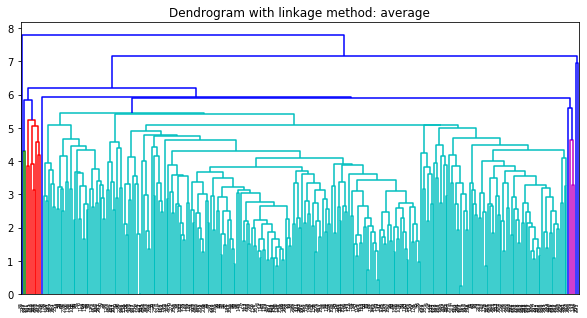

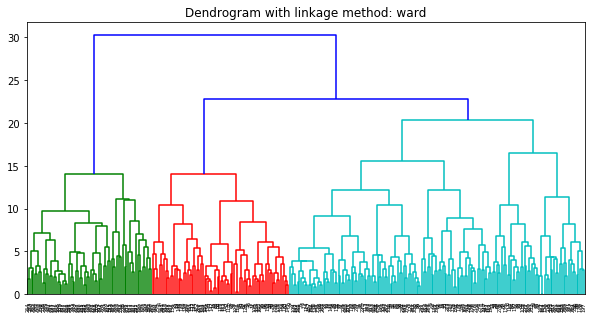

In [5]:
plt.figure(figsize=(10,5))
dendrogram(linkage(X_std,method='complete'))
plt.title('Dendrogram with linkage method: complete')
plt.show()

plt.figure(figsize=(10,5))
dendrogram(linkage(X_std,method='average'))
plt.title('Dendrogram with linkage method: average')
plt.show()

plt.figure(figsize=(10,5))
dendrogram(linkage(X_std,method='ward'))
plt.title('Dendrogram with linkage method: ward')
plt.show()

In [42]:
agg_cluster=AgglomerativeClustering(linkage='complete',affinity='euclidean',n_clusters=2)
pred_clusters1=agg_cluster1.fit_predict(X_std)

In [43]:
metrics.accuracy_score(y,pred_clusters1)

0.5466666666666666

In [44]:
agg_cluster=AgglomerativeClustering(linkage='average',affinity='cosine',n_clusters=2)
pred_clusters2=agg_cluster.fit_predict(X_std)

In [45]:
metrics.accuracy_score(y,pred_clusters2)

0.7566666666666667

In [46]:
agg_cluster=AgglomerativeClustering(linkage='ward',affinity='euclidean',n_clusters=2)
pred_clusters3=agg_cluster.fit_predict(X_std)

In [47]:
metrics.accuracy_score(y,pred_clusters3)

0.7333333333333333

As we can see above, "average" method has the best accuracy score.

Answer 2

In [61]:
for i,j in zip([pred_clusters1,pred_clusters2,pred_clusters3],['complete','average','ward']):
    print("ARI score of linkage method {}: {}".format(j,
        metrics.adjusted_rand_score(y, i)))
    print("Silhouette score of linkage method {}: {}".format(j,
        metrics.silhouette_score(X_std, i, metric='euclidean')),'\n')

ARI score of linkage method complete: -0.0012120123894599811
Silhouette score of linkage method complete: 0.3546908390806682 

ARI score of linkage method average: 0.25992011479856847
Silhouette score of linkage method average: 0.1499252648431385 

ARI score of linkage method ward: 0.21356322481520065
Silhouette score of linkage method ward: 0.15284384479320337 



-- We want to be high value for ARI and low value for Silhouette.

-- ARI and Silhouette score are 0.25,0.14 respectively for average method. This method display better performance from others.
